In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [2]:
# Load data
data = pd.read_csv('/content/sample_data/housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Step 1: Create a dataframe with latitude, longitude, and median house value

In [7]:
selected_data = data[['longitude', 'latitude', 'median_house_value']]
selected_data

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


Step 2: Visualize the dataset using a scatter plot

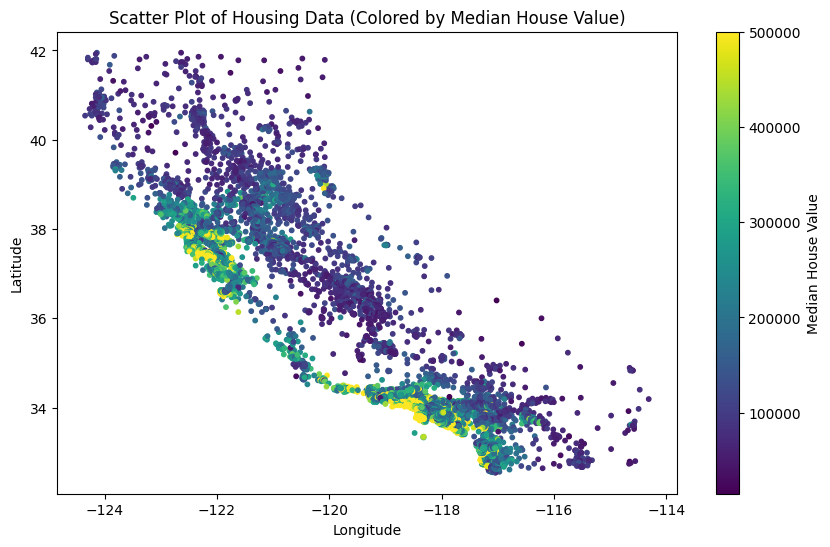

In [8]:
import matplotlib.pyplot as pl
# Visualize the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(selected_data['longitude'], selected_data['latitude'],
            c=selected_data['median_house_value'], cmap='viridis', s=10)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Housing Data (Colored by Median House Value)')
plt.show()

Step 3: Split the data into train and test sets (70-30 split)

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (70% train, 30% test)
train_data, test_data = train_test_split(selected_data, test_size=0.3, random_state=42)


Step 4: Normalize the data

In [10]:

from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data[['longitude', 'latitude', 'median_house_value']])
test_scaled = scaler.transform(test_data[['longitude', 'latitude', 'median_house_value']])

# Convert scaled data back to DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=['longitude', 'latitude', 'median_house_value'])
test_scaled_df = pd.DataFrame(test_scaled, columns=['longitude', 'latitude', 'median_house_value'])

train_scaled_df.head()


,longitude,latitude,median_house_value
0,0.780934,-0.805682,-0.113387
1,1.245270,-1.339473,-0.321603
2,-0.277552,-0.496645,0.456831
3,-0.706938,1.690024,-0.611895
4,-1.430902,0.992350,2.532087


Step 5: Fit a KMeans model with an initial number of clusters

In [11]:
from sklearn.cluster import KMeans

# Fit a KMeans model with an initial guess for the number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(train_scaled_df[['longitude', 'latitude']])

# Assign cluster labels to the training data
train_scaled_df['cluster'] = kmeans.labels_


Step 6: Visualize the clusters using a scatter plot

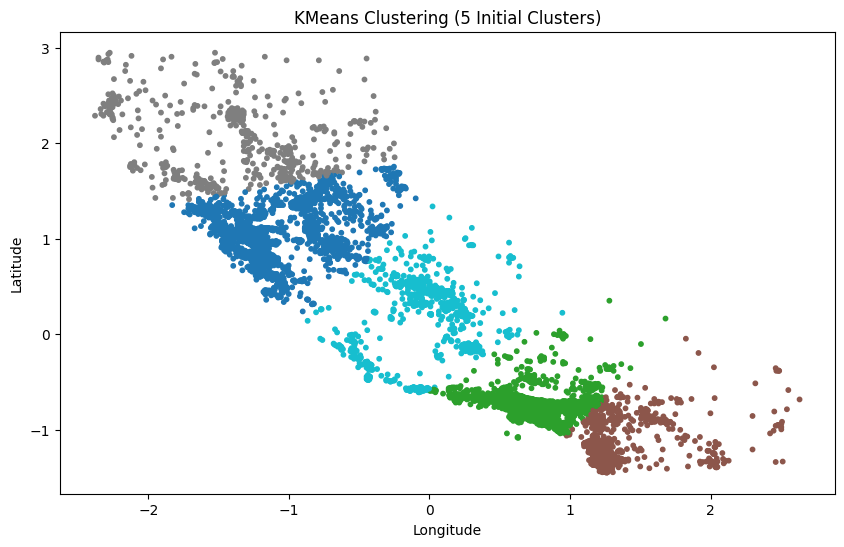

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(train_scaled_df['longitude'], train_scaled_df['latitude'], c=train_scaled_df['cluster'], cmap='tab10', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering (5 Initial Clusters)')
plt.show()


Step 7: Experiment with the number of clusters

In [13]:
from sklearn.metrics import silhouette_score

# Experiment with different numbers of clusters and calculate silhouette scores
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(train_scaled_df[['longitude', 'latitude']])
    score = silhouette_score(train_scaled_df[['longitude', 'latitude']], cluster_labels)
    silhouette_scores.append(score)


Step 8: Conduct silhouette analysis

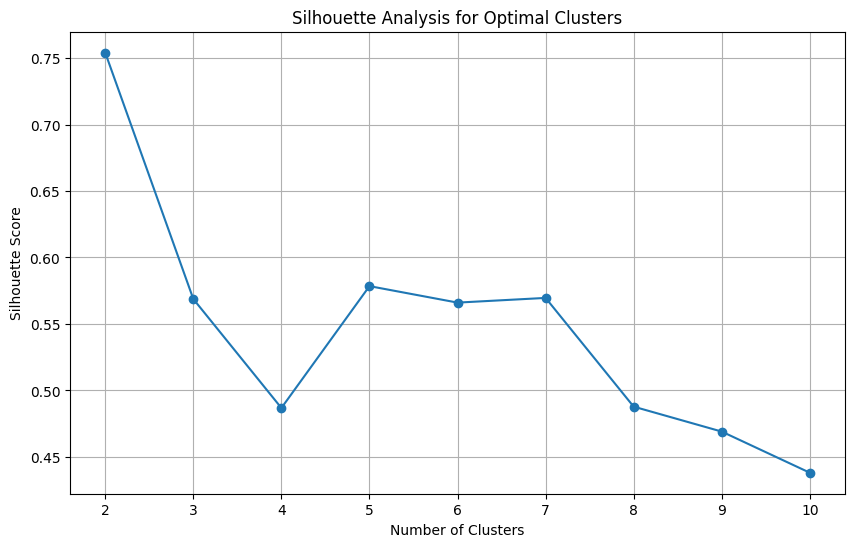

Optimal Number of Clusters: 2


In [14]:

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Determine the optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal Number of Clusters: {optimal_clusters}')


Step 9: Report the clustering output with the optimal number of clusters

In [15]:
# Fit the KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(train_scaled_df[['longitude', 'latitude']])

# Assign cluster labels to the training data
train_scaled_df['cluster'] = kmeans_optimal.labels_


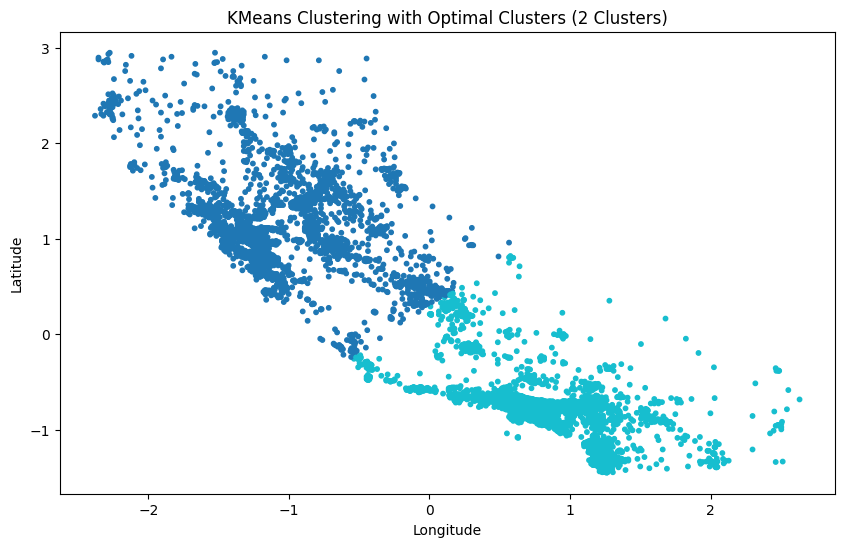

In [16]:

# Visualize the clusters with the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_scaled_df['longitude'], train_scaled_df['latitude'], c=train_scaled_df['cluster'], cmap='tab10', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'KMeans Clustering with Optimal Clusters ({optimal_clusters} Clusters)')
plt.show()


In [17]:
train_scaled_df.to_csv('clustered_housing_data.csv', index=False)

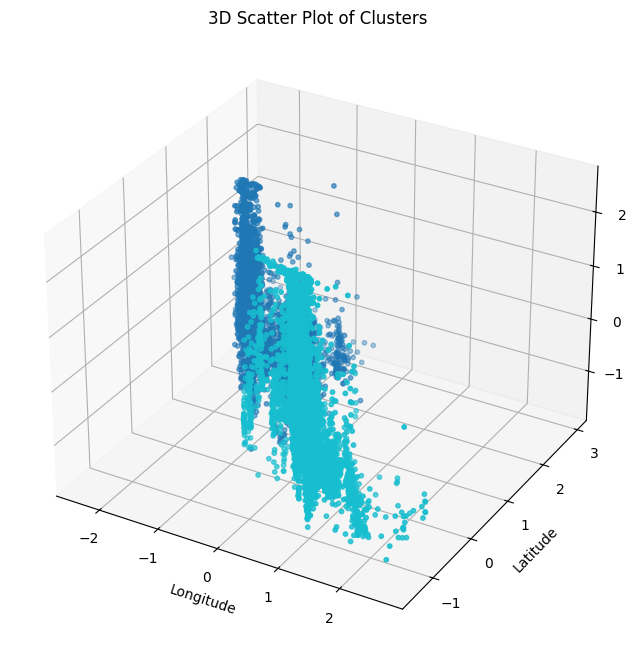

In [18]:
# 3D visualization of clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    train_scaled_df['longitude'],
    train_scaled_df['latitude'],
    train_scaled_df['median_house_value'],
    c=train_scaled_df['cluster'],
    cmap='tab10',
    s=10
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median House Value')
plt.title('3D Scatter Plot of Clusters')
plt.show()

In [19]:
test_data['cluster'] = kmeans_optimal.predict(test_scaled_df[['longitude', 'latitude']])


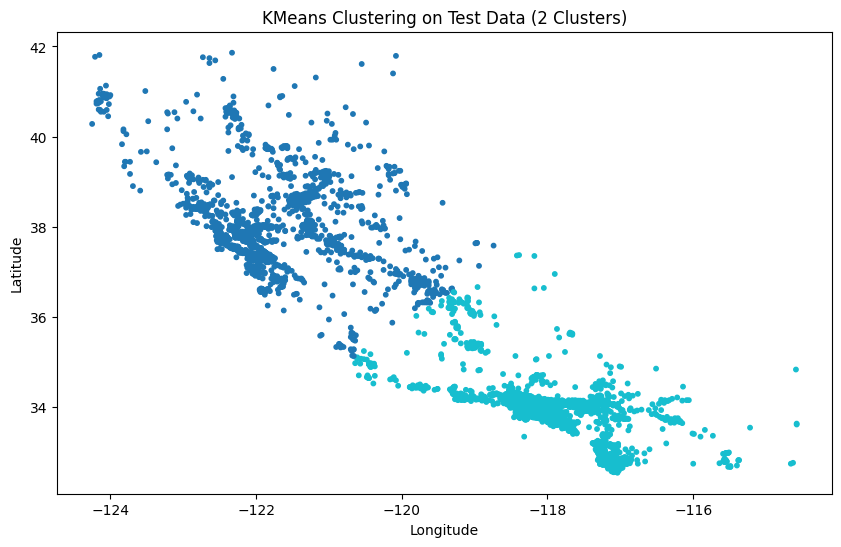

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(test_data['longitude'], test_data['latitude'], c=test_data['cluster'], cmap='tab10', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'KMeans Clustering on Test Data ({optimal_clusters} Clusters)')
plt.show()